In [1]:
!pip install opencv-python
!pip install pytesseract

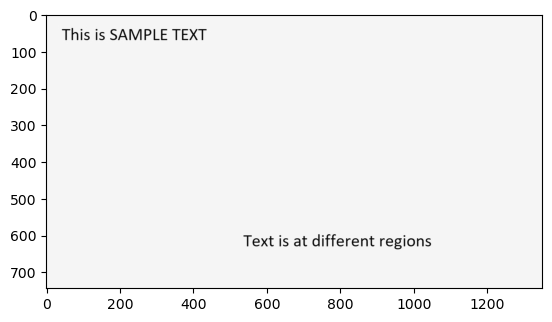

In [2]:
import time
#start calculating time
start_time = time.time()
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract
-OCR/tesseract' # In case using colab after installing above modules

# Read image from which text needs to be extracted
img = cv2.imread("sample.jpg")

# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# visualize the grayscale image 
plt.imshow(gray,cmap="gray")


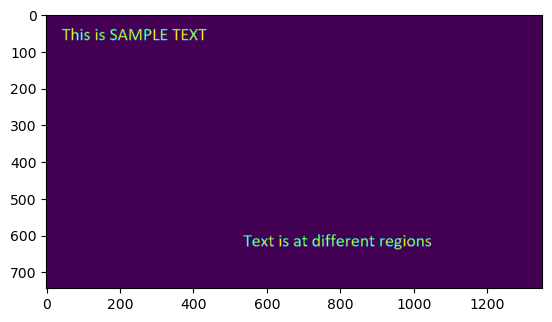

In [3]:
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
# visualize the thresholded image
plt.imshow(thresh1)

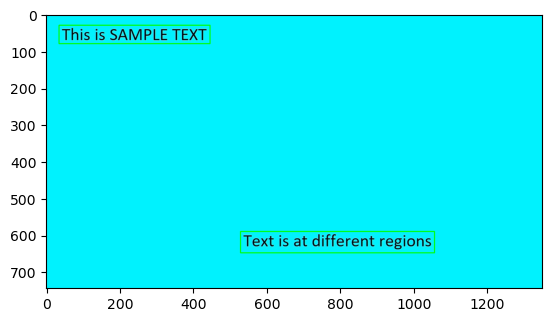

In [4]:
# Specify structure shape and kernel size. 
# Kernel size increases or decreases the area 
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect 
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                 cv2.CHAIN_APPROX_NONE)

# Creating a copy of image
im2 = img.copy()


cnt_list=[]
# Looping through the identified contours
# Then rectangular part is cropped and passed on
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # visualize the rectangle image
    plt.imshow(rect)
    
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
  
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
    cnt_list.append([x,y,text])

In [5]:
# This list sorts text with respect to their coordinates, in this way texts are in order from top to down
sorted_list = sorted(cnt_list, key=lambda x: x[1])

# A text file is created and flushed
file = open("recognized.txt", "w+")
file.write("")
file.close()

for x,y,text in sorted_list:
    # Open the file in append mode
    file = open("recognized3.txt", "a")

    # Appending the text into the file
    file.write(text)
    file.write("\n")

    # Close the file
    file.close()
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

Time taken: 1.1850764751434326 seconds
